## Problem 2

Import necessary Modules

In [135]:
from sklearn import datasets
from sklearn.model_selection import train_test_split as tts
import matplotlib.pyplot as plt
# Part 3 Imports
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

Load Dataset to Use

In [136]:
iris = datasets.load_iris()

Assign Data

In [137]:
x = iris.data
y = iris.target
feature_names = iris.feature_names

Train Test Split

In [138]:
split = 0.9
x_train, x_test, y_train, y_test = tts(x, y, train_size = split, random_state = 42)

10 Combinations

In [139]:
combinations = [
    [0], [1], [2], [3],
    [0, 1], [0, 2], [0, 3],
    [1, 2], [1, 3], [2, 3]
]

Function to Calculate Distance

In [140]:
def distance(a, b):
    return sum((a[i] - b[i]) ** 2 for i in range(len(a))) ** 0.5

Function for K Nearest Neighbors Prediction

In [141]:
def prediction(train_data, train_labels, test_point, k = 3):
    distances = []

    for i in range(len(train_data)):
        dist = distance(train_data[i], test_point)
        distances.append((dist, train_labels[i]))
    
    distances.sort()
    neighbors = [distances[i][1] for i in range(k)]
    
    return max(set(neighbors), key = neighbors.count)

Variables to Store Accuracy and Labels

In [142]:
accuracies = []
labels = []

Assess Feature Combinations

In [143]:
for combination in combinations:
    x_train_comb = [[x[i][j] for j in combination] for i in range(len(x_train))]
    x_test_comb = [[x[i][j] for j in combination] for i in range(len(x_test))]
    
    correct = 0
    for i in range(len(x_test_comb)):
        pred = prediction(x_train_comb, y_train, x_test_comb[i])
        if pred == y_test[i]:
            correct += 1
    
    accuracy = correct / len(x_test_comb)
    accuracies.append(accuracy)
    labels.append(", ".join([feature_names[j] for j in combination]))

Plot Results

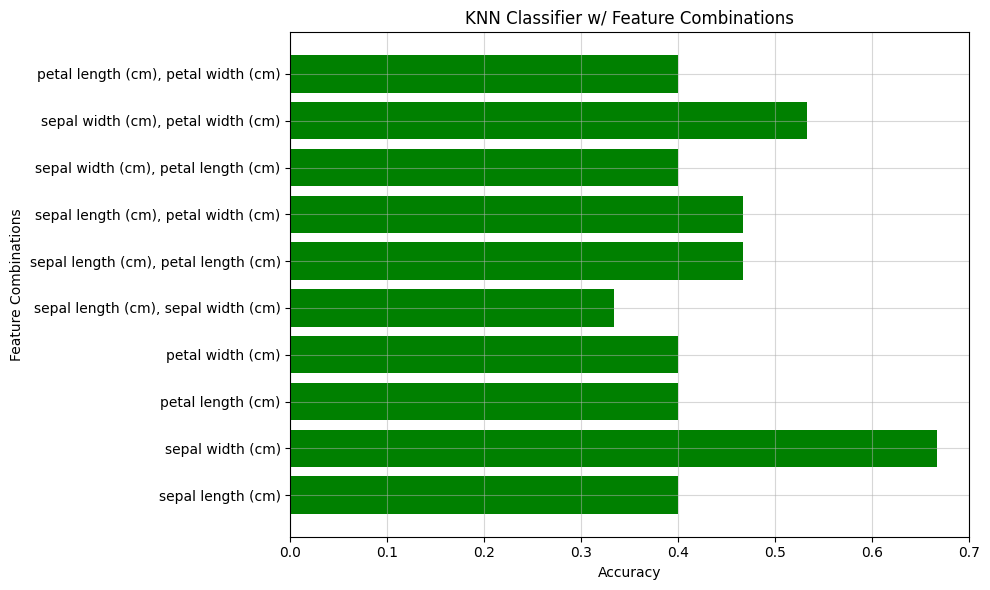

In [144]:
plt.figure(figsize = (10, 6))
plt.barh(labels, accuracies, color = "green", alpha = 1)

plt.xlabel("Accuracy")
plt.ylabel("Feature Combinations")
plt.title("KNN Classifier w/ Feature Combinations")

plt.grid(True, alpha = 0.5)
plt.tight_layout()
plt.show()

## Problem 3

Store Best Features

In [145]:
def pull_features(data, indices):
    return [[row[i] for i in indices] for row in data]

In [146]:
print(feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [147]:
best = [1]

In [148]:
best_features = pull_features(x, best)

Indicate Training Sizes

In [149]:
train_sizes = [n / 10 for n in range(1, 10)]

Create Variables to Store Results

In [150]:
results = {
    "KNN": [],
    "SVM": [],
    "MLP": [],
    "DT": []
}

Assess Peformance

In [151]:
for ts in train_sizes:
    x_train, x_test, y_train, y_test = tts(best_features, y, train_size = ts, random_state = 42)
    
    algorithms = {
        'KNN': KNeighborsClassifier(n_neighbors = 3),
        'SVM': SVC(),
        'MLP': MLPClassifier(max_iter = 1000),
        'DT': DecisionTreeClassifier()
    }
    
    for name, clf in algorithms.items():
        clf.fit(x_train, y_train)
        y_pred = clf.predict(x_test)
        acc = accuracy_score(y_test, y_pred)
        results[name].append(acc)

Plot Results

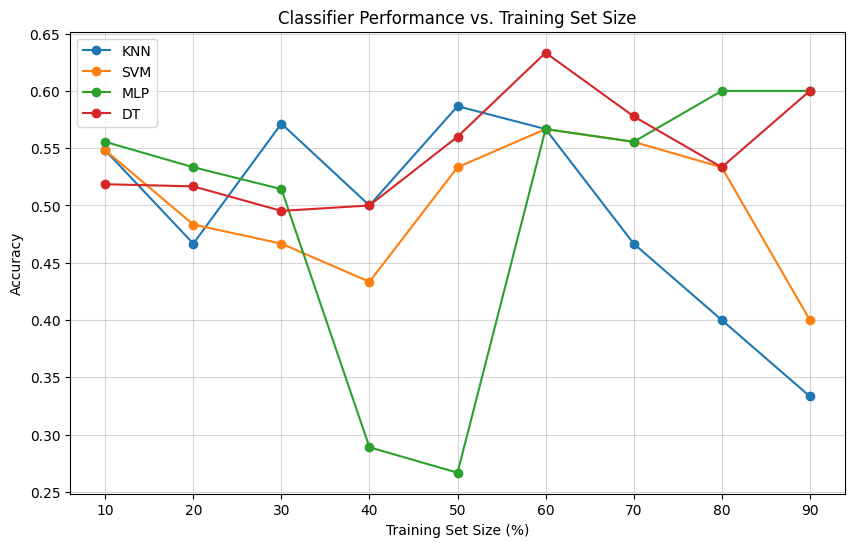

In [152]:
plt.figure(figsize = (10, 6))

for name, acc in results.items():
    plt.plot([size * 100 for size in train_sizes], acc, label = name, marker = 'o')

plt.xlabel("Training Set Size (%)")
plt.ylabel("Accuracy")
plt.title("Classifier Performance vs. Training Set Size")

plt.legend()
plt.grid(True, alpha = 0.5)
plt.show()

## Problem 1

Train Test Split

In [153]:
x_train, x_test, y_train, y_test = tts(x, y, train_size = 0.8, random_state = 42)

Variable to Store Decision Tree Results

In [154]:
dt_accuracies = []

Decision Tree Classifier 1 - 10

In [155]:
for depth in range(1, 11):
    alg = DecisionTreeClassifier(max_depth = depth)
    alg.fit(x_train, y_train)
    predictions = alg.predict(x_test)
    accuracy = accuracy_score(y_test, predictions)
    dt_accuracies.append(accuracy)
    print(f"Decision Tree (max_depth = {depth}) accuracy: {accuracy:.2f}")

Decision Tree (max_depth = 1) accuracy: 0.63
Decision Tree (max_depth = 2) accuracy: 0.97
Decision Tree (max_depth = 3) accuracy: 1.00
Decision Tree (max_depth = 4) accuracy: 1.00
Decision Tree (max_depth = 5) accuracy: 1.00
Decision Tree (max_depth = 6) accuracy: 1.00
Decision Tree (max_depth = 7) accuracy: 1.00
Decision Tree (max_depth = 8) accuracy: 1.00
Decision Tree (max_depth = 9) accuracy: 1.00
Decision Tree (max_depth = 10) accuracy: 1.00


Variable to Store KNN Results

In [156]:
knn_accuracies = []

K Nearest Neighbor Classifier 1 - 10

In [157]:
for k in range(1, 11):
    alg = KNeighborsClassifier(n_neighbors=k)
    alg.fit(x_train, y_train)
    predictions = alg.predict(x_test)
    accuracy = accuracy_score(y_test, predictions)
    knn_accuracies.append(accuracy)
    print(f"KNN (k = {k}) accuracy: {accuracy:.2f}")

KNN (k = 1) accuracy: 1.00
KNN (k = 2) accuracy: 1.00
KNN (k = 3) accuracy: 1.00
KNN (k = 4) accuracy: 1.00
KNN (k = 5) accuracy: 1.00
KNN (k = 6) accuracy: 1.00
KNN (k = 7) accuracy: 0.97
KNN (k = 8) accuracy: 1.00
KNN (k = 9) accuracy: 1.00
KNN (k = 10) accuracy: 1.00


K Nearest Neighbor Plot

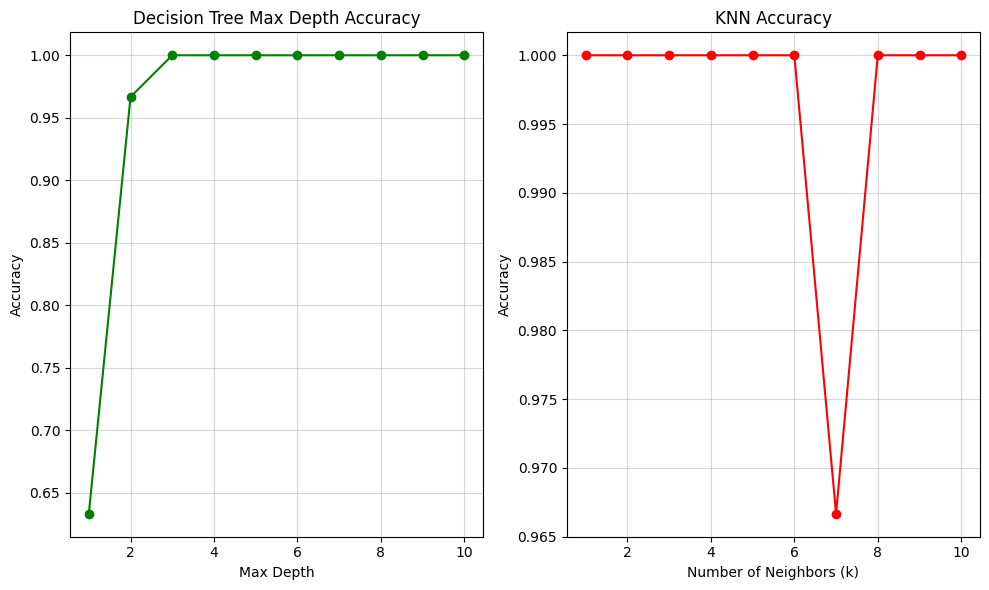

In [158]:
# DecisionTree Plot
plt.figure(figsize = (10, 6))

plt.subplot(1, 2, 1)
plt.plot(range(1, 11), dt_accuracies, marker = "o", color = "green")

plt.title("Decision Tree Max Depth Accuracy")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")

plt.grid(True, alpha = 0.5)

# KNN Plot
plt.subplot(1, 2, 2)
plt.plot(range(1, 11), knn_accuracies, marker = "o", color = "red")

plt.title("KNN Accuracy")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")

plt.grid(True, alpha = 0.5)
plt.tight_layout()
plt.show()

The Decision Tree plot depicts a very low accuracy at a max depth of one. There is a significant jump in accuracy when increasing the max depth to 2, though not yet 100%. From a max depth of 3 on, the accuracy reaches 100%. Anything with a depth below 2 risks underfitting (with a nearly 40% miss rate), while anything below 3 still has around a 4% loss potential. 

The K-Nearest Neighbor plot shows a stable accuracy reading up to 6 neighbors, then again from 8 on. There is a slight dip, a drop of just over 3%, at 7 neighbors before it jumps back to 100% again. There is not enough data to accurately suggest the cause of this.

Overall, the KNN classifier depicts a more stable algorithm. While, from what we can see from the depth range we tested, the decision tree improves in accuracy failry quickly and becomes stable with at least 3 neaighbors.